# 0. Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# 1. Data Read In

In [2]:
df = pd.read_csv("../data/interim/labeled_data_RG3.csv", parse_dates=True)
df.set_index("TimeStamp", inplace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1256 entries, 2020-10-21 00:57:37 to 2020-11-06 04:27:38
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   _id                       1256 non-null   object 
 1   PART_FACT_PLAN_DATE       1256 non-null   object 
 2   PART_FACT_SERIAL          1256 non-null   int64  
 3   PART_NAME                 1256 non-null   object 
 4   PassOrFail                1256 non-null   int64  
 5   Reason                    1256 non-null   object 
 6   Injection_Time            1256 non-null   float64
 7   Filling_Time              1256 non-null   float64
 8   Plasticizing_Time         1256 non-null   float64
 9   Cycle_Time                1256 non-null   float64
 10  Clamp_Close_Time          1256 non-null   float64
 11  Cushion_Position          1256 non-null   float64
 12  Switch_Over_Position      1256 non-null   float64
 13  Plasticizing_Position     1256 non-

In [4]:
df.head()

,_id,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NAME,PassOrFail,Reason,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,...,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
TimeStamp,,,,,,,,,,,,,,,,,,,,,
2020-10-21 00:57:37,5f8f87c09c0189cc6679187a,2020-10-21,17,"RG3 MOLD'G W/SHLD, LH",0,None,1.06,0.93,13.01,61.779999,...,60.299999,286.000000,285.000000,285.0,275.399994,265.100006,234.899994,65.800003,21.6,22.5
2020-10-21 00:57:37,5f8f87c09c0189cc6679187d,2020-10-21,18,"RG3 MOLD'G W/SHLD, RH",0,None,1.06,0.93,13.01,61.779999,...,60.299999,286.000000,285.000000,285.0,275.399994,265.100006,234.899994,65.800003,21.6,22.5
2020-10-21 00:56:34,5f8f87c09c0189cc66791885,2020-10-21,17,"RG3 MOLD'G W/SHLD, LH",0,None,1.06,0.93,12.99,61.779999,...,60.500000,286.200012,285.799988,285.0,275.600006,265.600006,234.800003,65.800003,21.5,22.5
2020-10-21 00:56:34,5f8f87c19c0189cc66791888,2020-10-21,18,"RG3 MOLD'G W/SHLD, RH",0,None,1.06,0.93,12.99,61.779999,...,60.500000,286.200012,285.799988,285.0,275.600006,265.600006,234.800003,65.800003,21.5,22.5
2020-10-21 00:55:34,5f8f87c29c0189cc6679188e,2020-10-21,17,"RG3 MOLD'G W/SHLD, LH",0,None,1.06,0.93,12.95,61.759998,...,60.200001,286.500000,285.100006,285.0,276.000000,265.100006,234.699997,65.900002,21.5,22.5


# 2. EDA

## 2.1. Preparation for EDA

In [5]:
# Classification of features
numerical_features = [x for x in df.columns if np.dtype(df[x]) == "float64"]
categorical_features = (
    set(df.columns.tolist())
    - set(numerical_features)
    - set(["_id", "PART_NAME", "PassOrFail", "Reason"])
)

In [6]:
# Separation of data based on pass/fail
pass_df = df.query("PassOrFail == 0")
fail_df = df.query("PassOrFail == 1")

## 2.2. Distribution of Categorical Features

In [7]:
categorical_features

{'PART_FACT_PLAN_DATE', 'PART_FACT_SERIAL'}

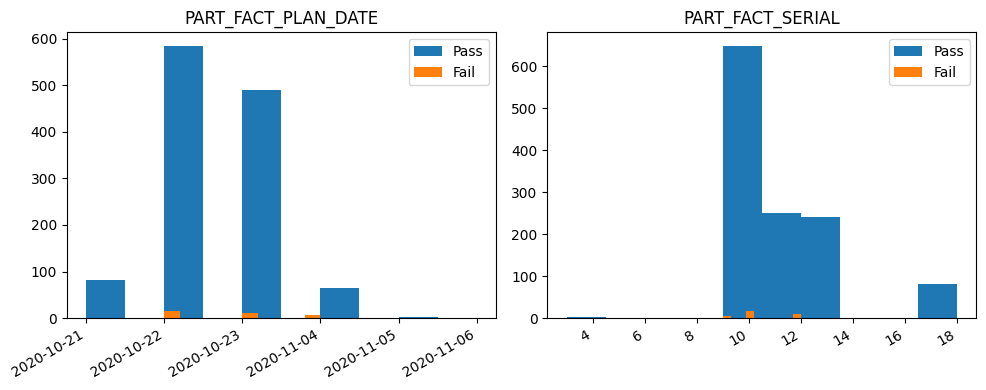

In [8]:
fig, axs = plt.subplots(figsize=(10, 4), ncols=2)

for i, feat in enumerate(categorical_features):
    axs[i].hist(pass_df[f"{feat}"], label="Pass", bins=10)
    axs[i].hist(fail_df[f"{feat}"], label="Fail", bins=10)
    axs[i].set_title(f"{feat}")
    axs[i].legend()
fig.autofmt_xdate()
plt.tight_layout()
plt.show();

- No clear pattern was observed for both `PART_FACT_PLAN_DATE` and `PART_FACT_SERIAL` on the target, `PassOrFail`.

## 2.3. Distribution of Numerical Features

In [9]:
len(numerical_features)

25

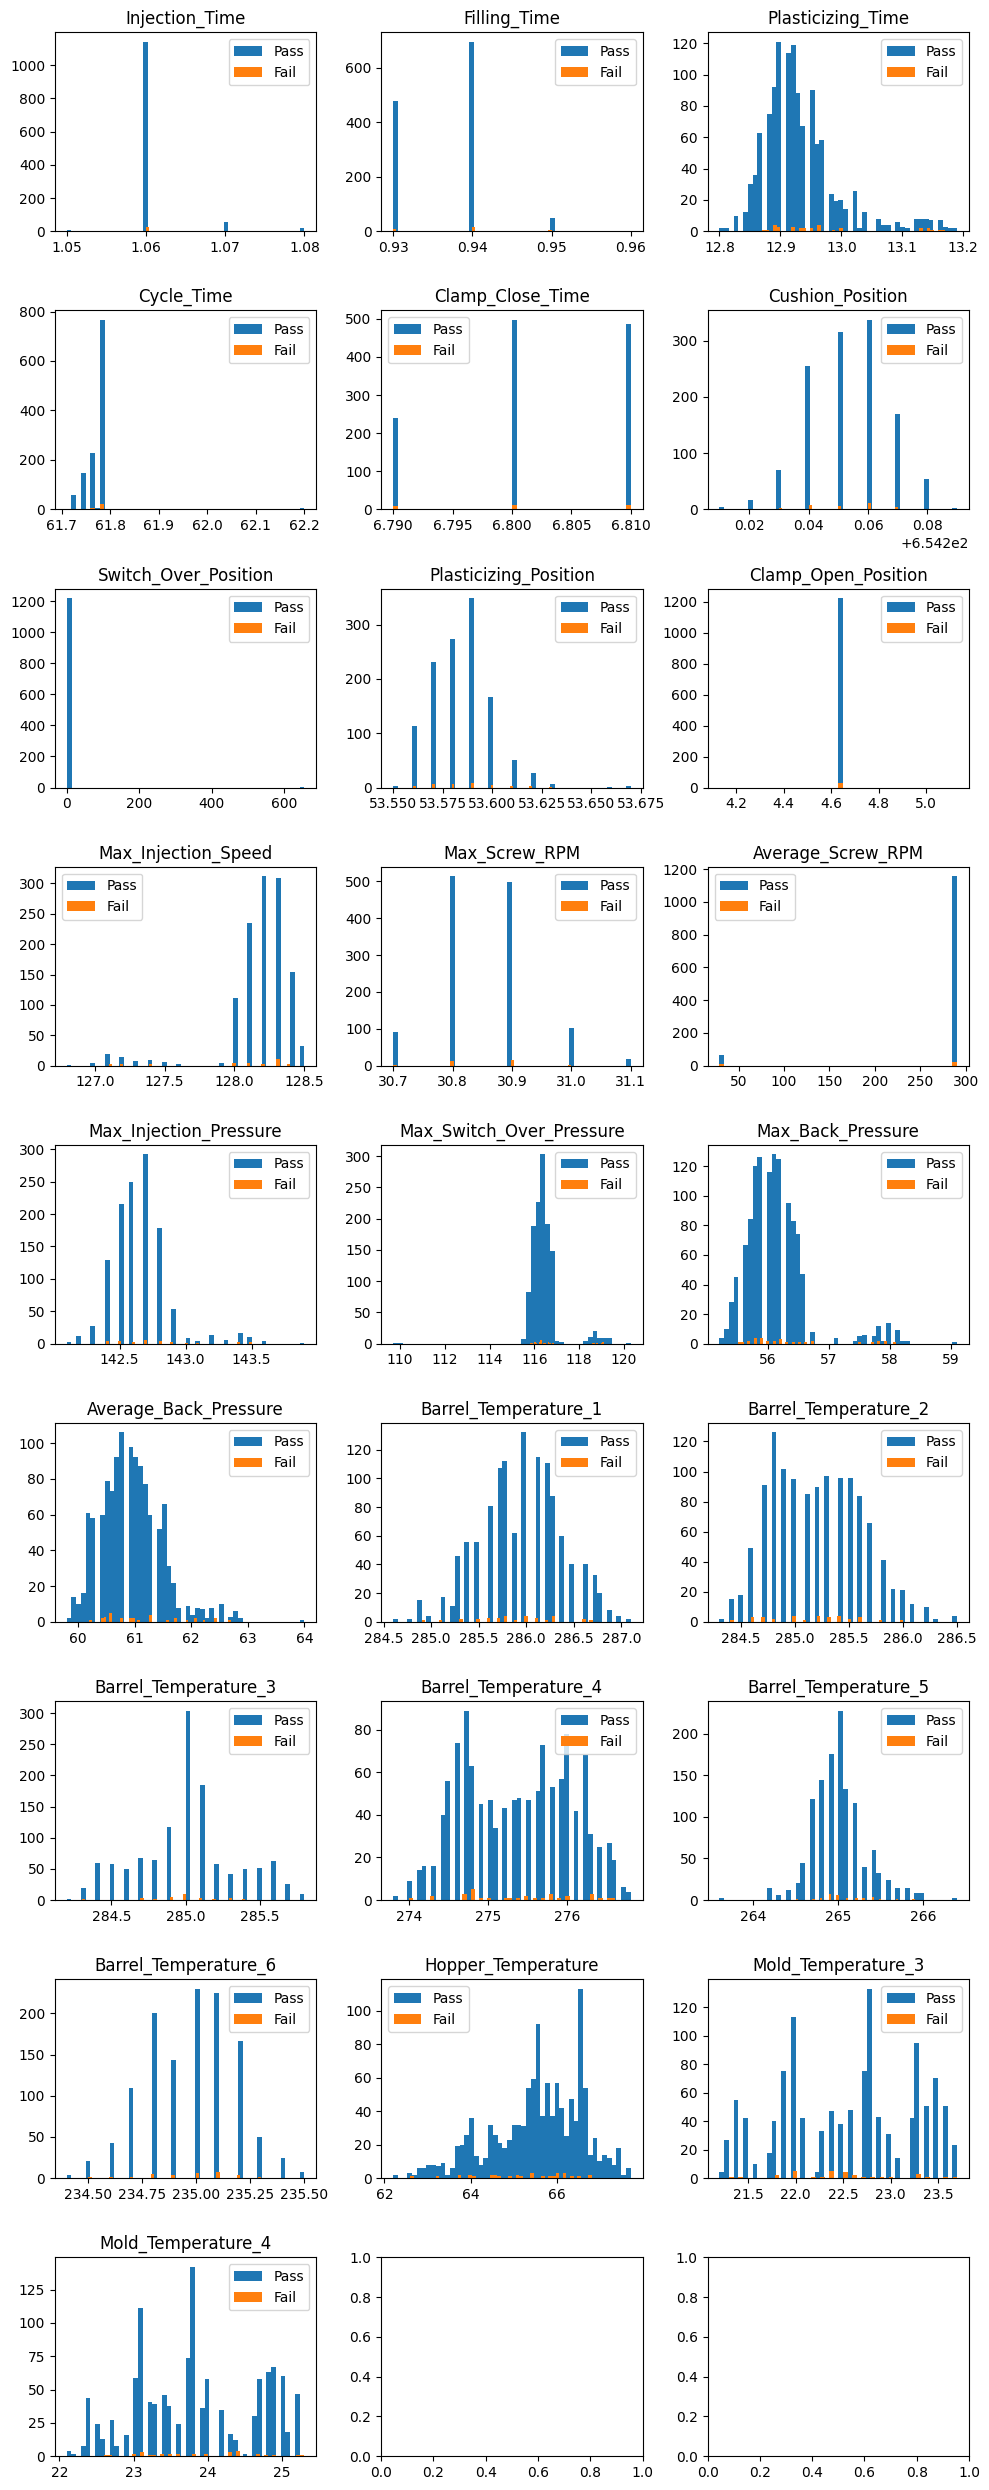

In [10]:
fig, axs = plt.subplots(figsize=(10, 25), nrows=9, ncols=3)

r = 0
c = 0
for i, feat in enumerate(numerical_features):
    axs[r, c].hist(pass_df[f"{feat}"], label="Pass", bins=50)
    axs[r, c].hist(fail_df[f"{feat}"], label="Fail", bins=50)
    axs[r, c].set_title(f"{feat}")
    axs[r, c].legend()
    if c < 2:
        c += 1
    else:
        r += 1
        c = 0
plt.tight_layout()
plt.show();

- It was difficult to see how the fail data is distributed

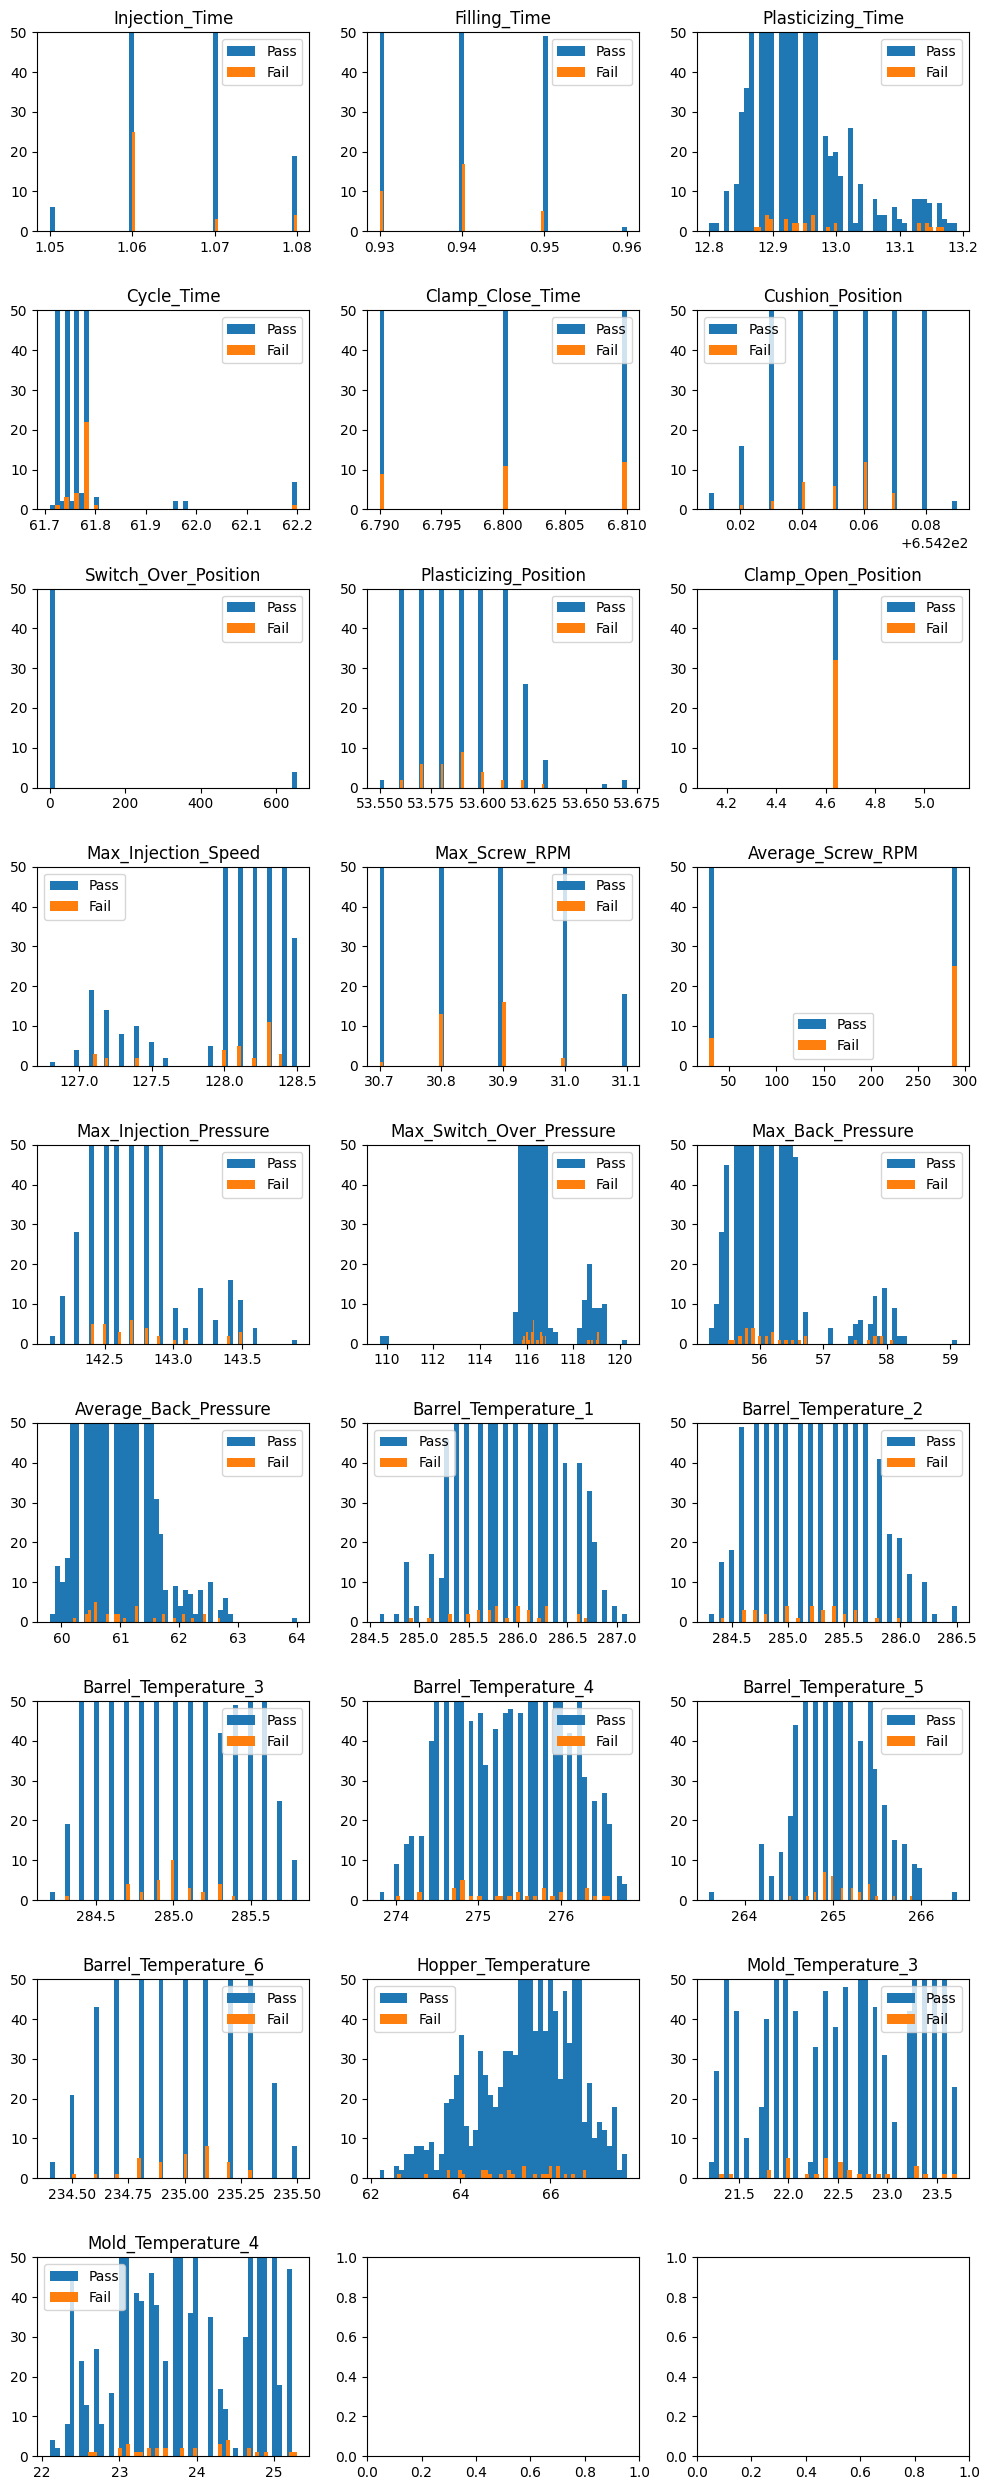

In [11]:
# The range of Y-axis was modified

fig, axs = plt.subplots(figsize=(10, 25), nrows=9, ncols=3)

r = 0
c = 0
for i, feat in enumerate(numerical_features):
    axs[r, c].hist(pass_df[f"{feat}"], label="Pass", bins=50)
    axs[r, c].hist(fail_df[f"{feat}"], label="Fail", bins=50)
    axs[r, c].set_title(f"{feat}")
    axs[r, c].set_ylim(0, 50)
    axs[r, c].legend()
    if c < 2:
        c += 1
    else:
        r += 1
        c = 0
plt.tight_layout()
plt.show();

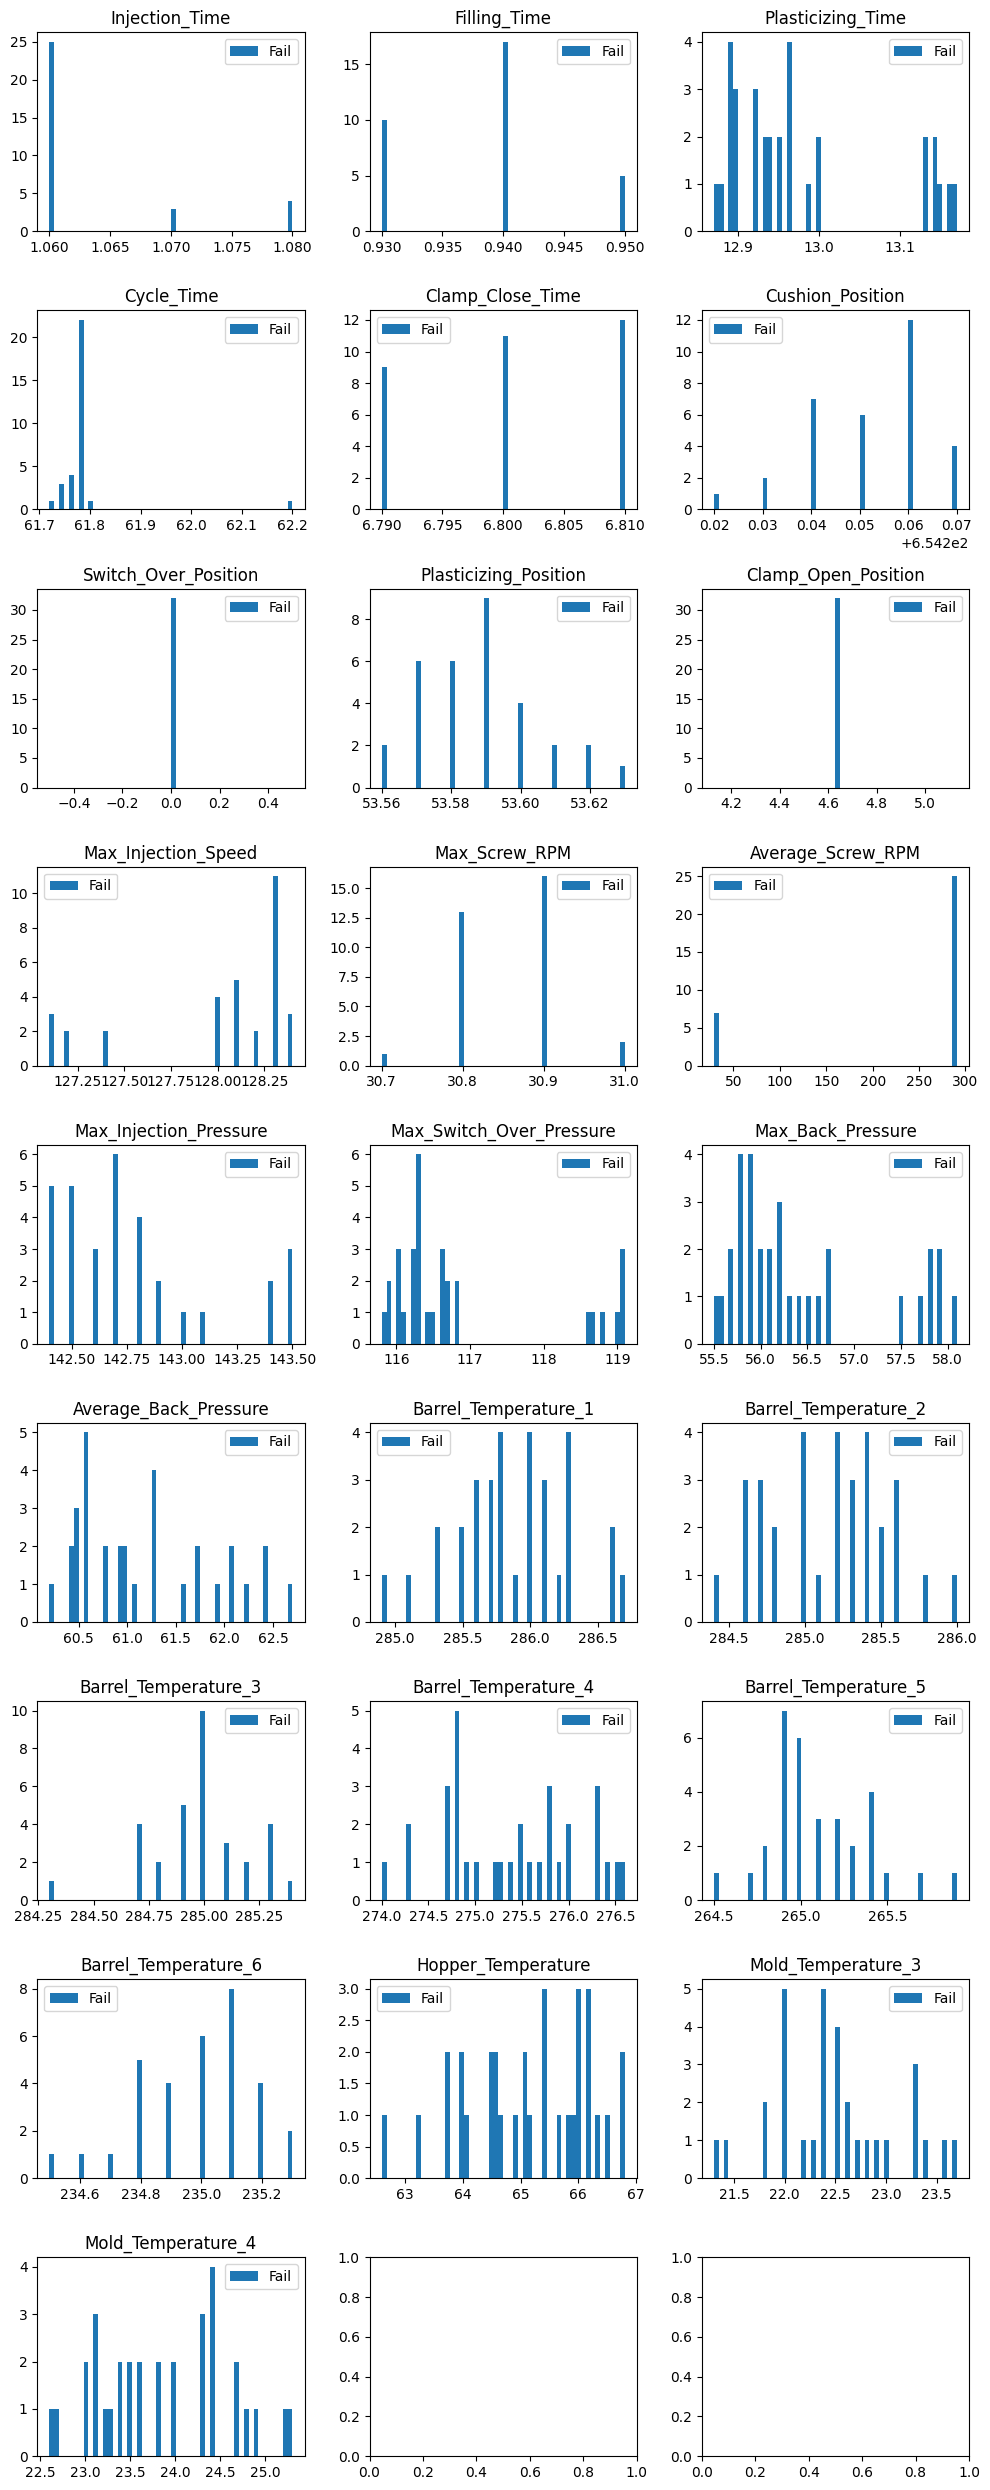

In [12]:
# Fail data only

fig, axs = plt.subplots(figsize=(10, 25), nrows=9, ncols=3)

r = 0
c = 0
for i, feat in enumerate(numerical_features):
    axs[r, c].hist(fail_df[f"{feat}"], label="Fail", bins=50)
    axs[r, c].set_title(f"{feat}")
    axs[r, c].legend()
    if c < 2:
        c += 1
    else:
        r += 1
        c = 0
plt.tight_layout()
plt.show();

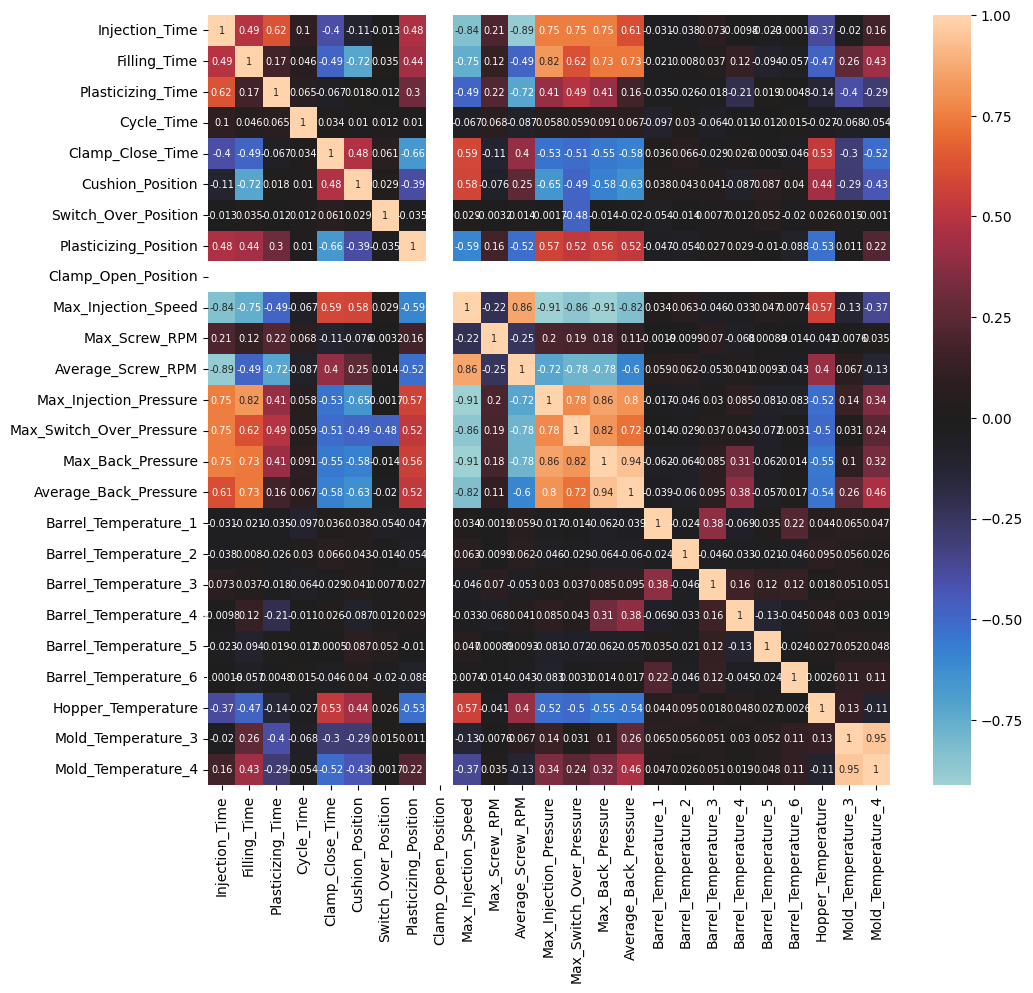

In [13]:
f, ax = plt.subplots(figsize=(11, 10))

sns.heatmap(
    df[numerical_features].corr(method="pearson"),
    center=0,
    annot=True,
    annot_kws={"size": 7},
);

- In the case of Numerical Features, the effects of `Switch_Over_Position` and `Clamp_Open_Position` seem to be negligible.

# 3. Features Selection

In [14]:
drop_features = (
    list(categorical_features)
    + ["Switch_Over_Position", "Clamp_Open_Position"]
    + ["PART_NAME"]
)

In [15]:
final_columns = set(df.columns.tolist()) - set(drop_features)

In [16]:
df = df[list(final_columns)].copy()

In [17]:
df

,_id,Filling_Time,Barrel_Temperature_2,Max_Injection_Pressure,Barrel_Temperature_4,Cushion_Position,Barrel_Temperature_5,Mold_Temperature_4,Injection_Time,Max_Injection_Speed,...,Barrel_Temperature_1,Barrel_Temperature_6,Reason,Max_Switch_Over_Pressure,Cycle_Time,PassOrFail,Max_Back_Pressure,Plasticizing_Time,Max_Screw_RPM,Clamp_Close_Time
TimeStamp,,,,,,,,,,,,,,,,,,,,,
2020-10-21 00:57:37,5f8f87c09c0189cc6679187a,0.93,285.000000,142.300003,275.399994,654.289978,265.100006,22.500000,1.06,128.500000,...,286.000000,234.899994,None,115.699997,61.779999,0,55.599998,13.01,30.900000,6.81
2020-10-21 00:57:37,5f8f87c09c0189cc6679187d,0.93,285.000000,142.300003,275.399994,654.289978,265.100006,22.500000,1.06,128.500000,...,286.000000,234.899994,None,115.699997,61.779999,0,55.599998,13.01,30.900000,6.81
2020-10-21 00:56:34,5f8f87c09c0189cc66791885,0.93,285.799988,142.399994,275.600006,654.280029,265.600006,22.500000,1.06,128.500000,...,286.200012,234.800003,None,115.800003,61.779999,0,55.700001,12.99,30.900000,6.81
2020-10-21 00:56:34,5f8f87c19c0189cc66791888,0.93,285.799988,142.399994,275.600006,654.280029,265.600006,22.500000,1.06,128.500000,...,286.200012,234.800003,None,115.800003,61.779999,0,55.700001,12.99,30.900000,6.81
2020-10-21 00:55:34,5f8f87c29c0189cc6679188e,0.93,285.100006,142.500000,276.000000,654.270020,265.100006,22.500000,1.06,128.399994,...,286.500000,234.699997,None,116.000000,61.759998,0,55.799999,12.95,30.900000,6.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-04 05:43:29,5fa23fbc9c0189cc66e44ddf,0.94,284.899994,143.000000,274.899994,654.250000,265.000000,24.299999,1.07,127.500000,...,285.899994,234.899994,None,118.300003,61.779999,0,57.099998,13.12,31.100000,6.79
2020-11-04 05:43:29,5fa23fbd9c0189cc66e44de3,0.94,284.899994,143.000000,274.899994,654.250000,265.000000,24.299999,1.07,127.500000,...,285.899994,234.899994,None,118.300003,61.779999,0,57.099998,13.12,31.100000,6.79
2020-11-05 03:00:02,5fa36afd9c0189cc66eebe41,0.94,284.899994,142.899994,274.399994,654.270020,264.899994,23.700001,1.07,128.000000,...,285.899994,235.100006,None,117.199997,61.779999,0,56.200001,12.96,30.900000,6.79


In [18]:
df.to_csv("../data/processed/labeled_data_RG3.csv", index=True)

# 4. Distributions of Selected Features for Pass/Fail Data

In [19]:
# Just to extract the final features for the boxplot

final_features = [
    "Average_Back_Pressure",
    "Average_Screw_RPM",
    "Barrel_Temperature_1",
    "Barrel_Temperature_2",
    "Barrel_Temperature_3",
    "Barrel_Temperature_4",
    "Barrel_Temperature_5",
    "Barrel_Temperature_6",
    "Clamp_Close_Time",
    "Cushion_Position",
    "Cycle_Time",
    "Filling_Time",
    "Hopper_Temperature",
    "Injection_Time",
    "Max_Back_Pressure",
    "Max_Injection_Pressure",
    "Max_Injection_Speed",
    "Max_Screw_RPM",
    "Max_Switch_Over_Pressure",
    "Mold_Temperature_3",
    "Mold_Temperature_4",
    "Plasticizing_Position",
    "Plasticizing_Time",
]

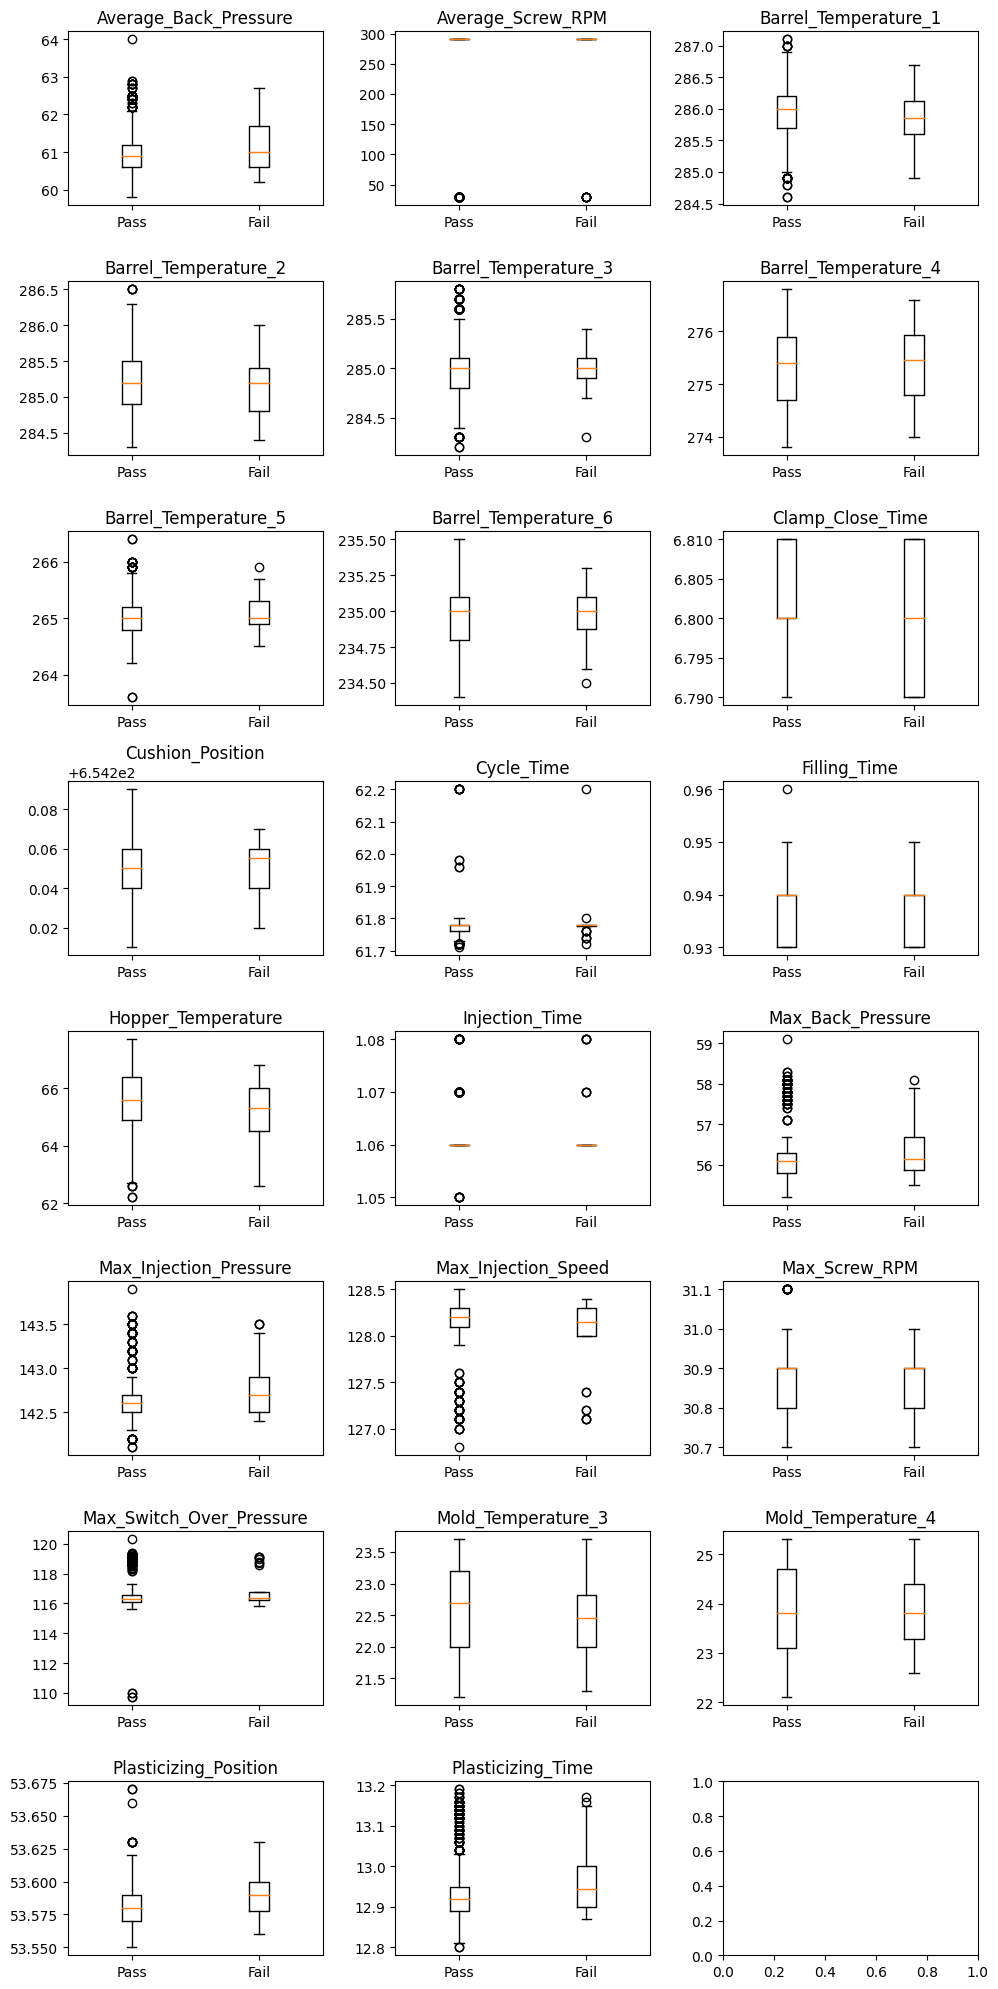

In [20]:
fig, axs = plt.subplots(figsize=(10, 20), nrows=8, ncols=3)

r = 0
c = 0
for i, feat in enumerate(list(final_features)):
    axs[r, c].boxplot(
        [pass_df[f"{feat}"], fail_df[f"{feat}"]],
        # positions=[1, 3],
        labels=["Pass", "Fail"],
    )
    axs[r, c].set_title(f"{feat}")
    if c < 2:
        c += 1
    else:
        r += 1
        c = 0
# fig.autofmt_xdate()
plt.tight_layout()
plt.show();

- The difference in features for Pass/Fail data of `RG3` seems to be less obvious than that for `CN7`.